In [3]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime
    
n = 28
nL1 = nL2 = n**2
nL3 = nL1*4

[X,Y] = np.meshgrid(range(n), range(n))

taum = 10*ms
taue = 100*ms
taui = 50*ms
duration = 500*ms

dge = 200*mV

eqsPOISSON='''
rates : Hz
x : 1 (constant)
y : 1 (constant)
'''

eqsLGN='''
dv/dt  = (ge-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
x : 1 (constant)
y : 1 (constant)
'''

eqsV1='''
dv/dt  = (ge-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
x : 1 (constant)
y : 1 (constant)
ori : 1 (constant)
'''

################################################## Layer 1 ################################################################

L1 = NeuronGroup(nL1,
                 eqsPOISSON,
                 threshold='rand()<rates*dt')

L1.x = X.flatten()
L1.y = Y.flatten()
FR = 100*Hz
pat = np.zeros((28,28))
pat[10:17,10:17] = 1
L1.rates = pat.flatten()*FR

################################################## Layer 2 ################################################################

L2 = NeuronGroup(nL2,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2.x = X.flatten()
L2.y = Y.flatten()

# Kernel 3x3
#e1 = Synapses(L1, L2, on_pre='ge += dge')
#e1.connect(condition = 'i==j')
#i1 = Synapses(L1, L2, on_pre='ge -= 1/8*dge')
#i1.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

# Kernel 4x4 (center ON 3x3)
#e1 = Synapses(L1, L2, on_pre='ge += 1/9*dge')
#e1.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2')
#i1 = Synapses(L1, L2, on_pre='ge -= 1/16*dge')
#i1.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)>=2 and sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<3')

# Kernel 5x5 (center ON 3x3)
e1 = Synapses(L1, L2, on_pre='ge += 1/9*dge')
e1.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2')
i1 = Synapses(L1, L2, on_pre='ge -= 1/36*dge')
i1.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)>=2 and sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<4')

sp1 = SpikeMonitor(L1)
sp2 = SpikeMonitor(L2)
run(duration)

## Kernel 3x3 (On center 1 pixel)

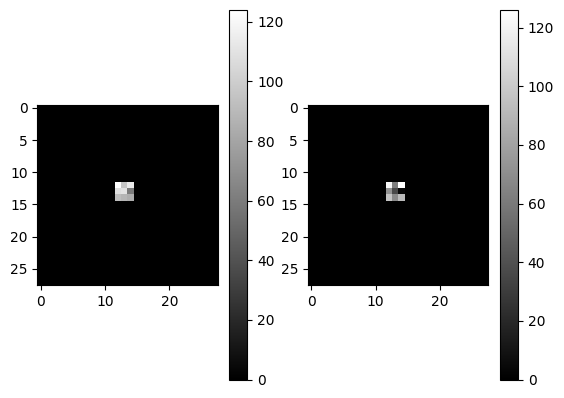

In [44]:
subplot(121)
tmp = sp1.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
colorbar()

subplot(122)
tmp = sp2.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
colorbar()

## Kernel 4x4 (On center 3x3 pixel)

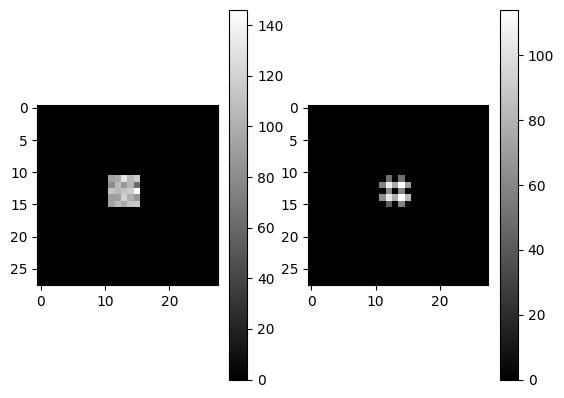

In [50]:
subplot(121)
tmp = sp1.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
colorbar()

subplot(122)
tmp = sp2.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
colorbar()

## Kernel 5x5 (On center 3x3 pixel)

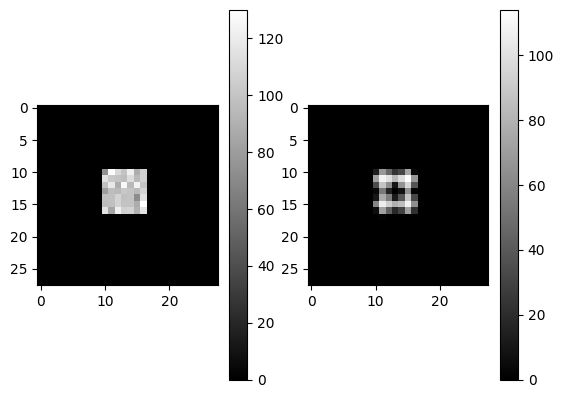

In [52]:
subplot(121)
tmp = sp1.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
colorbar()

subplot(122)
tmp = sp2.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
colorbar()

# Comparison response to stimuli 2x2

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


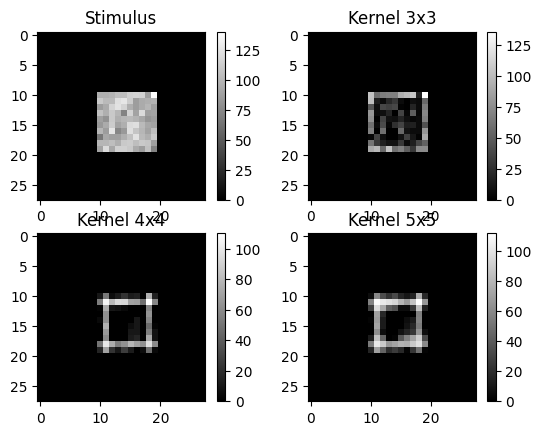

In [1]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime
    
n = 28
nL1 = nL2 = n**2
nL3 = nL1*4

[X,Y] = np.meshgrid(range(n), range(n))

taum = 10*ms
taue = 100*ms
taui = 50*ms
duration = 500*ms

dge = 200*mV

eqsPOISSON='''
rates : Hz
x : 1 (constant)
y : 1 (constant)
'''

eqsLGN='''
dv/dt  = (ge-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
x : 1 (constant)
y : 1 (constant)
'''

eqsV1='''
dv/dt  = (ge-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
x : 1 (constant)
y : 1 (constant)
ori : 1 (constant)
'''

################################################## Layer 1 ################################################################

L1 = NeuronGroup(nL1,
                 eqsPOISSON,
                 threshold='rand()<rates*dt')

L1.x = X.flatten()
L1.y = Y.flatten()
FR = 100*Hz
pat = np.zeros((28,28))
pat[10:20,10:20] = 1
L1.rates = pat.flatten()*FR

################################################## Layer 2a ###############################################################

L2a = NeuronGroup(nL2,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2a.x = X.flatten()
L2a.y = Y.flatten()

# Kernel 3x3
ea = Synapses(L1, L2a, on_pre='ge += dge')
ea.connect(condition = 'i==j')
ia = Synapses(L1, L2a, on_pre='ge -= 1/8*dge')
ia.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

################################################## Layer 2b ###############################################################

L2b = NeuronGroup(nL2,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2b.x = X.flatten()
L2b.y = Y.flatten()

# Kernel 4x4 (center ON 3x3)
eb = Synapses(L1, L2b, on_pre='ge += 1/9*dge')
eb.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2')
ib = Synapses(L1, L2b, on_pre='ge -= 1/16*dge')
ib.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)>=2 and sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<3')

################################################## Layer 2c ###############################################################

L2c = NeuronGroup(nL2,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2c.x = X.flatten()
L2c.y = Y.flatten()

# Kernel 5x5 (center ON 3x3)
ec = Synapses(L1, L2c, on_pre='ge += 1/9*dge')
ec.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2')
ic = Synapses(L1, L2c, on_pre='ge -= 1/36*dge')
ic.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)>=2 and sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<4')

sp1 = SpikeMonitor(L1)
sp2a = SpikeMonitor(L2a)
sp2b = SpikeMonitor(L2b)
sp2c = SpikeMonitor(L2c)
run(duration)

subplot(121)
tmp = sp1.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
title('Stimulus')
colorbar()

subplot(122)
tmp = sp2a.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
title('Kernel 3x3')
colorbar()

'''
subplot(223)
tmp = sp2b.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
title('Kernel 4x4')
colorbar()

subplot(224)
tmp = sp2c.count/duration
tmp = asarray(tmp)
tmp = tmp.reshape(28,28)
imshow(tmp,cmap='gray')
title('Kernel 5x5')
colorbar()
'''